# Assignment-14 

## Dimensionality Reduction

### Name- NITESH KUMAR Batch-4

# Q1. Write Steps Involved in PCA.

### Answer:-

### step 1. Data Preprocessing:

In PCA, we start with a dataset that typically has multiple features or variables. It's essential to ensure that our data is properly prepared:

1. Ensure our data is in a numeric format, as PCA works with numeric data.
2. Handle missing values, if any, through imputation or removal.
3. Address outliers if they exist, as they can distort the results.
4. Standardize or normalize the data: 
PCA is sensitive to the scale of the variables, so you should scale the data to have a mean of 0 and a standard deviation of 1. This step ensures that all variables are on the same scale and prevents any one variable from dominating the PCA process.

### step 2. Compute the Covariance Matrix:

1. Once the data is preprocessed and standardized, we calculate the covariance matrix. The covariance matrix is a square matrix that represents the relationships between each pair of variables.

2. The element in the (x, y) position of the covariance matrix indicates how variable x and variable y covary. It's calculated as the average of the product of the deviations of the two variables from their respective means.

### step 3. Eigendecomposition of the Covariance Matrix:

Eigendecomposition is the process of breaking down the covariance matrix into its constituent parts:

1. Eigenvalues: These represent the magnitude of variance in the data along the corresponding eigenvectors' directions. Eigenvalues are non-negative, and they are sorted in descending order.

2. Eigenvectors: These are the directions in the original feature space along which the data varies the most. Each eigenvector corresponds to a specific eigenvalue.

### step 4. Select Principal Components:

1. To decide how many principal components to retain, we often use the concept of explained variance. Our aim to keep enough principal components to capture a significant portion of the total variance in the data. For example, we might aim to retain enough components to explain 95% of the total variance.

2. Calculate the explained variance for each eigenvalue by dividing it by the sum of all eigenvalues. Then, we sum the explained variances starting from the largest eigenvalue and stop when the cumulative explained variance reaches our desired threshold (e.g. 95%).

### step 5. Projection onto the Principal Components:

1. After selecting the top K eigenvectors (principal components) based on the explained variance, we construct a projection matrix by stacking these eigenvectors as columns.

2. We then project the original data onto the selected principal components using this projection matrix. The result is a reduced-dimensional representation of our data.

### step 6. Interpretation:

1. Each principal component is a linear combination of the original features. We can interpret them to understand the patterns or relationships they capture in the data.

2. PCA is often used for dimensionality reduction, but it can also be a tool for feature engineering and data compression.

### step 7. Reconstruction (Optional):

If necessary, we can reconstruct the data back into the original feature space by multiplying the reduced-dimensional data by the transpose of the projection matrix. However, some information may be lost during dimensionality reduction, so the reconstructed data may not be identical to the original data.

### step 8. Modeling or Analysis:

We can use the reduced-dimensional data for various purposes, such as machine learning modeling, clustering, or visualization. The reduced-dimensional data can simplify subsequent analyses and reduce computational complexity.

### step 9. Validation and Evaluation:

Finally, it's crucial to evaluate the effectiveness of PCA in our specific application. We can do this by assessing the performance of our downstream tasks or analyses using the reduced-dimensional data.

# Q2. Perform dimensionality reduction using PCA on the US Arrests dataset (enclosed herewith). What variance can be explained by PC1 & PC2?

### Answer:-

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("USArrests.csv")

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
df.rename(columns={"Unnamed: 0":"US_region"},inplace=True)

In [9]:
df.head(3)

,US_region,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [11]:
df.isnull().sum()

US_region    0
Murder       0
Assault      0
UrbanPop     0
Rape         0
dtype: int64

In [12]:
df.duplicated().any()

False

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   US_region  50 non-null     object 
 1   Murder     50 non-null     float64
 2   Assault    50 non-null     int64  
 3   UrbanPop   50 non-null     int64  
 4   Rape       50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [15]:
df.describe(include="all")

,US_region,Murder,Assault,UrbanPop,Rape
count,50,50.00000,50.000000,50.000000,50.000000
unique,50,NaN,NaN,NaN,NaN
top,Alabama,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,7.78800,170.760000,65.540000,21.232000
std,NaN,4.35551,83.337661,14.474763,9.366385
min,NaN,0.80000,45.000000,32.000000,7.300000
25%,NaN,4.07500,109.000000,54.500000,15.075000
50%,NaN,7.25000,159.000000,66.000000,20.100000
75%,NaN,11.25000,249.000000,77.750000,26.175000


In [17]:
df.corr()

/tmp/ipykernel_130/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_130/2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


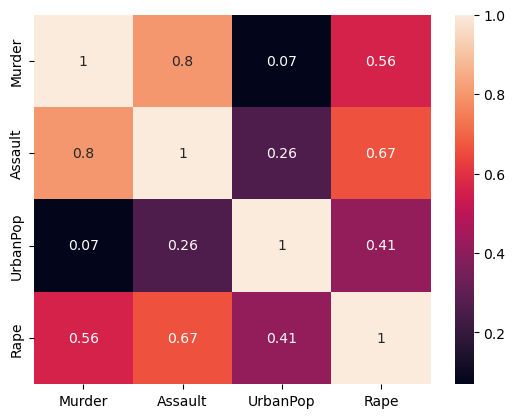

In [21]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Data preprocessing

In [23]:
df.head()

,US_region,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [24]:
# define dependent and independent features
X=df.drop("US_region",axis=1)

In [26]:
X.head(2)

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5


In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
X_scaled=scaler.fit_transform(X)

In [33]:
X_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

### PCA Model implementation

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca=PCA(n_components=2)

In [45]:
pca.fit_transform(X_scaled)

array([[ 0.98556588,  1.13339238],
       [ 1.95013775,  1.07321326],
       [ 1.76316354, -0.74595678],
       [-0.14142029,  1.11979678],
       [ 2.52398013, -1.54293399],
       [ 1.51456286, -0.98755509],
       [-1.35864746, -1.08892789],
       [ 0.04770931, -0.32535892],
       [ 3.01304227,  0.03922851],
       [ 1.63928304,  1.2789424 ],
       [-0.91265715, -1.57046001],
       [-1.63979985,  0.21097292],
       [ 1.37891072, -0.68184119],
       [-0.50546136, -0.15156254],
       [-2.25364607, -0.10405407],
       [-0.79688112, -0.2701647 ],
       [-0.75085907,  0.95844029],
       [ 1.56481798,  0.87105466],
       [-2.39682949,  0.37639158],
       [ 1.76336939,  0.42765519],
       [-0.48616629, -1.4744965 ],
       [ 2.10844115, -0.15539682],
       [-1.69268181, -0.63226125],
       [ 0.99649446,  2.39379599],
       [ 0.69678733, -0.26335479],
       [-1.18545191,  0.53687437],
       [-1.26563654, -0.19395373],
       [ 2.87439454, -0.7756002 ],
       [-2.38391541,

In [46]:
explained_variance=pca.explained_variance_ratio_

In [47]:
explained_variance

array([0.62006039, 0.24744129])

In [48]:
print("Variance Explained by PC1:", explained_variance[0])
print("Variance Explained by PC2:", explained_variance[1])

Variance Explained by PC1: 0.6200603947873737
Variance Explained by PC2: 0.24744128813496025


# Q3. Why Dimension Reduction is an Important Concept in Data Science?

### Answer:-

Dimension reduction is a fundamental concept in data science and machine learning that involves reducing the number of features or variables in a dataset while preserving as much valuable information as possible. This reduction is achieved by transforming the data from a high-dimensional space to a lower-dimensional space.

Here are detailed explanations of why dimension reduction is important in data science:

#### Curse of Dimensionality:

1. The Curse of Dimensionality refers to the exponential increase in the volume of data as the number of features or dimensions increases. This leads to data sparsity, making it challenging to obtain enough data points to adequately cover the feature space.

2. In high-dimensional spaces, data points become sparse, and it becomes difficult to find meaningful patterns, relationships, or clusters in the data.

#### Overfitting Prevention:

1. High-dimensional datasets are prone to overfitting, where machine learning models perform exceptionally well on the training data but poorly on unseen/test data.

2. Reducing dimensionality can help mitigate overfitting by simplifying the model and reducing its complexity. This results in models that generalize better to new, unseen data.

#### Improved Model Efficiency:

1. High-dimensional datasets require more computational resources and time to train and deploy machine learning models.
2. Dimension reduction can lead to more efficient models, which are faster to train and use fewer resources.

#### Visualization and Interpretation:

1. Dimension reduction techniques, such as Principal Component Analysis (PCA) allow data scientists to project high-dimensional data into lower-dimensional spaces (e.g., 2D or 3D), making it easier to visualize.

2. Lower-dimensional visualizations enable the exploration of data patterns, clusters, and outliers, aiding in data interpretation.

#### Feature Engineering:

1. Dimension reduction can be viewed as a form of feature engineering. It transforms the original features into a new set of features (e.g., principal components) that capture the most critical information in the data.

2. These transformed features often perform better in machine learning models, as they may reduce noise and emphasize the essential data characteristics.

#### Data Compression:

1. In some applications, dimension reduction is used for data compression. By representing data in a lower-dimensional space, you can reduce storage requirements while retaining most of the essential information.

2. This is particularly useful when dealing with large datasets or when memory and storage resources are limited.

#### Interpretability:

1. Lower-dimensional data is often easier to interpret than high-dimensional data. It allows data scientists to focus on a subset of features that are most relevant to the problem at hand.

2. It can help identify the most influential variables in a dataset, aiding in feature selection and decision-making.

#### Reduced Complexity:

1. Simplifying the data by reducing dimensionality can make it easier to communicate findings and results to stakeholders who may not have expertise in high-dimensional spaces.

2. It can enhance the clarity of data-driven insights and recommendations.

#### Data Preprocessing:

1. Dimension reduction is frequently used as a preprocessing step before applying other machine learning techniques, such as clustering, classification, or regression.

2. It can lead to more robust and accurate models by removing noise, redundancy, or multicollinearity among features.

#### Collinearity Reduction:

1. Dimension reduction techniques can mitigate multicollinearity, a condition where features are highly correlated with each other. Multicollinearity can lead to unstable and less interpretable models in regression analysis.

#### Big Data and Computational Efficiency:

1. In the era of big data, dimension reduction becomes even more critical. Handling massive datasets with many features can be computationally challenging.

2. Reducing dimensionality can make analysis and modeling more feasible and scalable.

# Q4. Explore Other Dimension Reduction Methods other than PCA. Explain it.

### Answer:-

### 1. t-Distributed Stochastic Neighbor Embedding (t-SNE):

#### Use Case:
Visualization of high-dimensional data.
#### Explanation:
t-SNE is a technique for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D. It is particularly useful when you want to explore and understand the local structure of your data. t-SNE models pairwise similarities between data points in both the high-dimensional and lower-dimensional spaces, optimizing to keep similar points close and dissimilar points apart. It is effective at revealing clusters and patterns in the data, making it a powerful tool for exploratory data analysis and visualization.

### 2. Isomap:

#### Use Case:
Preserving the intrinsic geometry of data.
#### Explanation:
Isomap is a manifold learning technique used to uncover the intrinsic structure or geometry of high-dimensional data. It does this by constructing a graph where data points are nodes, and edges represent pairwise distances. Isomap then computes the geodesic distances (shortest paths) between points on the graph, which reflect the underlying geometry of the data. The algorithm aims to find a lower-dimensional embedding that preserves these geodesic distances, allowing it to reveal the intrinsic shape of the data, such as nonlinear relationships or clusters.

### 3. Locally Linear Embedding (LLE):

#### Use Case:
Preserving local linear relationships within the data.
#### Explanation:
LLE is another manifold learning technique that focuses on preserving local linear relationships among data points. It works by representing each data point as a weighted sum of its nearest neighbors, effectively capturing the local structure of the data. LLE then seeks to find a lower-dimensional representation of the data where these local relationships are maintained. LLE is useful for uncovering nonlinear patterns in data, making it suitable for tasks like dimensionality reduction in nonlinear manifolds.

### 4. Linear Discriminant Analysis (LDA):

#### Use Case:
Feature extraction and classification tasks.
#### Explanation:
LDA is a supervised dimensionality reduction technique, primarily used in classification problems. It aims to find a lower-dimensional space where the classes of data points are well-separated. LDA does this by maximizing the ratio of the between-class variance to the within-class variance. It identifies the directions (linear combinations of features) that best discriminate between classes. LDA is particularly effective when you have labeled data and want to extract features that enhance class separability.

### 5. Autoencoders:

#### Use Case:
Nonlinear dimensionality reduction and feature learning.
#### Explanation:
Autoencoders are neural networks used for unsupervised dimensionality reduction and feature learning. They consist of an encoder network that maps high-dimensional input data to a lower-dimensional latent space and a decoder network that reconstructs the input data from the latent space. Autoencoders can capture complex, nonlinear relationships in the data and are trained to minimize reconstruction errors. The latent space representation can be used for dimensionality reduction or feature extraction tasks.

### 6. Independent Component Analysis (ICA):

#### Use Case:
Separating mixed signals into their independent sources.
#### Explanation:
ICA is a technique used to separate mixed signals into their original, statistically independent sources. It is often applied in signal processing and blind source separation tasks. In the context of dimensionality reduction, ICA can be used to identify underlying factors or sources of variation in data. Unlike PCA, which finds orthogonal components based on variance, ICA aims to find components that are as statistically independent as possible.

### 7. Non-Negative Matrix Factorization (NMF):

#### Use Case:
Identifying underlying patterns or topics in data.
#### Explanation:
NMF is a matrix factorization technique that decomposes a high-dimensional data matrix into two lower-dimensional matrices, typically with non-negative values. It is often used in applications such as text mining and image analysis to identify hidden patterns or topics within the data. NMF enforces non-negativity constraints, making it interpretable for tasks where features should be non-negative, such as topic modeling.